Max Wnag<br>
PHYS 434<br>
Lab 3<br>
Partner: Alexander Hyde

In [229]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

Here we will be looking at the temperature reading for a thermal control system, the average temperature being 12K and a 0.4 degree precision. This resembles a 1D Gaussian with mean of 12 and StD of 0.4. However, there are times where the system misbehaves, and these glitches are mixed in with the temperature readings. We want to try and identify these bad reading so that we can omit them and make the distribution resemble more of the real data. Below is the log scale of the data distribution, fitted with a Gaussian containing the new mean and StD as result of the inclusion of bad readings.

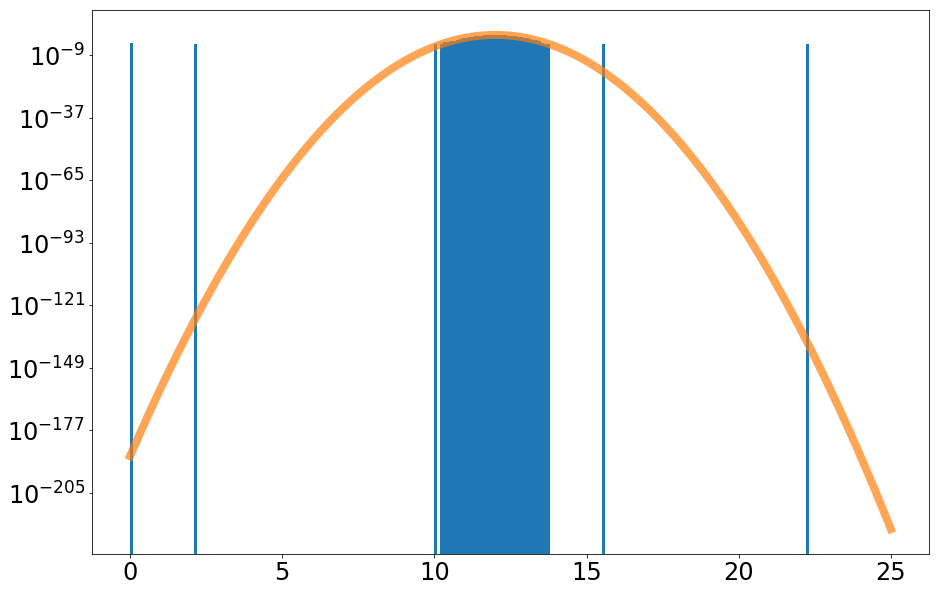

In [250]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
count,bins,bars = plt.hist(d,223, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
mean = sum(d)/len(d)
std = np.sqrt(np.sum(np.square(d - mean))/len(d))
x = np.linspace(0,25,1000)
plt.plot(x,stats.norm.pdf(x,loc = mean, scale = std),linewidth = 8,alpha = 0.7)
plt.show()

A) The question we want to answer is: If my data resembles Gaussian, which of my readings can be considered glitches and do not fit in the said Gaussian?

In order to test this, I separated my distribution into bins of 0.1K width, and found the area of the histogram bar where the bins are. Then, I calculated the integral of the Gaussian fit for each bin, and did some ratio sensitivity tests, and chose a threshold of 2. Note that as K increased, the CDF kept on getting rounded up to 1 by the machine, resulting in an integral of 0. Hence I stopped using the ratio test and make all the subsequent readings considered bad.

In [251]:
def badTest(sens):
    result = []
    for i in range(len(bins)-1):
        test = abs(stats.norm.cdf(bins[i],mean,std) - stats.norm.cdf(bins[i]+0.1,mean,std))
        if (test == 0 or count[i]*0.1/test > sens):
            bad = np.where(np.logical_and(d >= bins[i], d <= (bins[i]+0.1)))[0]
            for j in range(len(bad)):
                result.append(d[bad[j]])
    return result

In [252]:
result = badTest(2)
print('My test determined that there are ' + str(len(result)) + ' bad readings, and they are ' + str(result))

My test determined that there are 6 bad readings, and they are [0.0, 0.0, 2.1, 10.0, 15.6, 22.3]


|           | True T | Bad T |
|-----------|-----------|-------------|
| Test Good | 100000    | 8       |
| Test Bad | 6     | 100002       |

B) It seems that in my test, I threw away one good data. As I decrease the statistical threshold of my test, we can see that the amount of omission increases. However, this is not a predictable quantity, as after my threshold reaches < 1.2, the amount of omission seems to have decreased dramatically, albeit still more omitted than at higher thresholds.

In [253]:
print('Ratio between threshold of 1.5 and 2 is ' + str(len(badTest(1.5))/len(badTest(2))))
print('Ratio between threshold of 1.4 and 1.5 is ' + str(len(badTest(1.4))/len(badTest(1.5))))
print('Ratio between threshold of 1.3 and 1.4 is ' + str(len(badTest(1.3))/len(badTest(1.4))))
print('Ratio between threshold of 1.2 and 1.3 is ' + str(len(badTest(1.2))/len(badTest(1.3))))
print('Ratio between threshold of 1.1 and 1.2 is ' + str(len(badTest(1.1))/len(badTest(1.2))))

Ratio between threshold of 1.5 and 2 is 1.0
Ratio between threshold of 1.4 and 1.5 is 1.6666666666666667
Ratio between threshold of 1.3 and 1.4 is 1.0
Ratio between threshold of 1.2 and 1.3 is 1.0
Ratio between threshold of 1.1 and 1.2 is 1.0


C) As for commission, two bad data was mistaken as good data by my test. The readings are 10.3 and 12.7. This is probably due to how close they are to resembling the actual distribution. It would require a very high sensitivity in order to detect them, but that would also mean increasing omission drastically. We can see below that even at threshold of 1, 12.7 was still not detected, and there are already over half of total data being omitted.

In [255]:
for i in [2, 1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9]:
    result = badTest(i)
    print('At threshold of ' + str(i) + ', there are ' + str(len(result)) + ' bad readings.')
    if 10.3 in result:
        print('10.3 detected.')
    if 12.7 in result:
        print('12.7 detected.')

At threshold of 2, there are 6 bad readings.
At threshold of 1.5, there are 6 bad readings.
At threshold of 1.4, there are 10 bad readings.
10.3 detected.
At threshold of 1.3, there are 10 bad readings.
10.3 detected.
At threshold of 1.2, there are 10 bad readings.
10.3 detected.
At threshold of 1.1, there are 10 bad readings.
10.3 detected.
At threshold of 1.0, there are 77415 bad readings.
10.3 detected.
At threshold of 0.9, there are 99130 bad readings.
10.3 detected.
12.7 detected.


## Problem 2

In this problem, we are looking at a 2D Gaussian or a bivariate normal distribution with 1 arcsecond RMS. The distribution is the result of atmospheric/instrumental effects on the alignment of stars. The question we want to answer is:

If there is a potential asteroid and have some true movement between the images, what is the minimal distance the asteroid must travel for the motion reading to be significant, i.e. 5 sigma?

The distance traveled by the potential asteroid will be $l$, and in polar coordinates $l = sqrt(x^2 + y^2)$. We are interested in the PDF of the distribution for $l$. The 2D Gaussian here is made up of two identical 1D Gaussians with 1 StD, in which the PDF for $l$ is identical to a Rayleigh PDF with shape paramter equal to the StD of the mean of the two 1D Gaussians. Hence, $σ = 1$. 

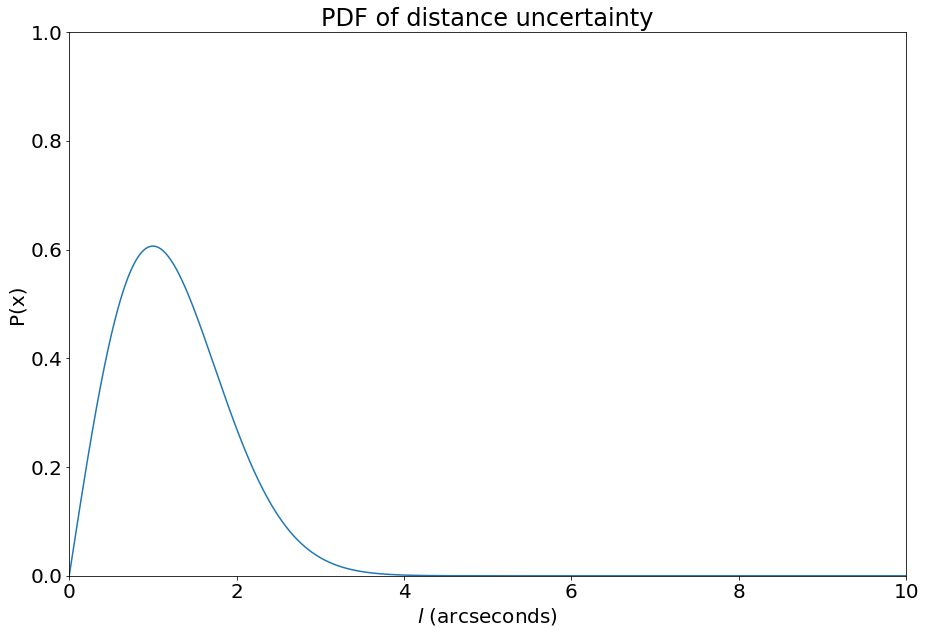

Minimum distance for a 5 sigma detection of motion is 5.489079776034238 arcseconds.


In [256]:
x = np.linspace(0,10,10000)
plt.xlim([0,10])
plt.ylim([0,1])
plt.plot(x,stats.rayleigh.pdf(x,0,1))
plt.tick_params(labelsize = 20)
plt.title("PDF of distance uncertainty", fontsize = 24)
plt.ylabel("P(x)", fontsize = 20)
plt.xlabel("$l$ (arcseconds)", fontsize = 20)
plt.show()
l = stats.rayleigh.ppf(stats.norm.cdf(5,0,1))
print('Minimum distance for a 5 sigma detection of motion is ' + str(l) + ' arcseconds.')

## Problem 3

Once again we are looking at cosmic ray detection. This time, we use the fact that the sun and moon can absorb cosmic rays with high enough energy to indicate the direction of cosmic rays. Looking at the cosmic ray sky, from the moon sized patch we would detect normally 1 cosmic ray per minute. However, we observed where the moon is for 8 hours per night for 15 days and only saw 6800 cosmic rays in total. The expected cosmic ray observation would have been $1*60*8*15 = 7200$. The question we want to answer is:

What is the probability of my 6800 cosmic rays reading and what is it's significance in terms of sigma?

From past experiences, we can recognize that each minute of reading results in a Poisson distribution. So first, we want convolute the distribution 7200 times. In lab 2, we found out that the n-th order convolution is really just the base Poisson distribution with the mean multiplied by n. So we can just construct a Poisson distribution with mean as 7200, and then find the integral from 0 to 6800.

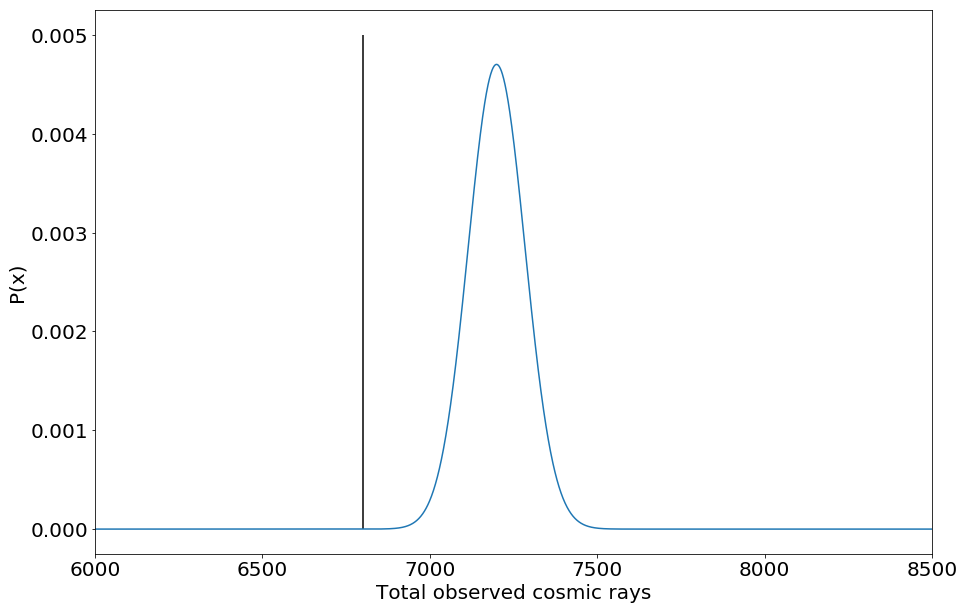

The sigma for my 6800 cosmic ray reading is -4.750747965777188.


In [257]:
x = np.linspace(0,14400,14401)
plt.plot(x,stats.poisson.pmf(x,7200))
plt.tick_params(labelsize = 20)
plt.xlim([6000, 8500])
plt.vlines(6800,0,0.005)
plt.ylabel("P(x)", fontsize = 20)
plt.xlabel("Total observed cosmic rays", fontsize = 20)
plt.show()
sigma = stats.norm.ppf(stats.poisson.cdf(6800,7200))
print('The sigma for my 6800 cosmic ray reading is ' + str(sigma) + '.')